In [10]:
import streamlit as st
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
df = pd.read_csv('2022_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Team                   70 non-null     object
 1   Season                 70 non-null     int64 
 2   firstDowns             70 non-null     int64 
 3   fourthDownConversions  70 non-null     int64 
 4   fourthDowns            70 non-null     int64 
 5   fumblesLost            70 non-null     int64 
 6   fumblesRecovered       70 non-null     int64 
 7   games                  70 non-null     int64 
 8   interceptions          70 non-null     int64 
 9   interceptionTDs        70 non-null     int64 
 10  interceptionYards      70 non-null     int64 
 11  kickReturns            70 non-null     int64 
 12  kickReturnTDs          70 non-null     int64 
 13  kickReturnYards        70 non-null     int64 
 14  netPassingYards        70 non-null     int64 
 15  passAttempts           70

In [23]:
df['Logo'] = "Logos/" + df['Team'] + '.png'
df.head()

,Team,Season,firstDowns,fourthDownConversions,fourthDowns,fumblesLost,fumblesRecovered,games,interceptions,interceptionTDs,...,rushingAttempts,rushingTDs,rushingYards,sacks,tacklesForLoss,thirdDownConversions,thirdDowns,totalYards,turnovers,Logo
0,Illinois,2022,275,12,25,11,9,13,5,1,...,545,18,2180,27,79,71,186,4902,16,https://github.com/braydenvanm/2022_Big_Ten_fo...
1,Indiana,2022,230,9,23,5,7,12,13,0,...,396,15,1330,20,63,65,192,3939,18,https://github.com/braydenvanm/2022_Big_Ten_fo...
2,Iowa,2022,180,5,15,10,14,13,7,4,...,423,12,1234,34,79,49,176,3271,17,https://github.com/braydenvanm/2022_Big_Ten_fo...
3,Maryland,2022,263,17,28,7,12,13,8,0,...,469,23,1837,24,62,83,199,5220,15,https://github.com/braydenvanm/2022_Big_Ten_fo...
4,Michigan,2022,326,18,21,4,5,14,6,1,...,600,41,3344,37,68,84,186,6422,10,https://github.com/braydenvanm/2022_Big_Ten_fo...


In [100]:
offensive_stats = ['firstDowns','fourthDownConversions','fourthDowns','fumblesLost','netPassingYards','passAttempts','passCompletions','passesIntercepted','passingTDs','possessionTime','rushingAttempts','rushingTDs','rushingYards','thirdDownConversions','thirdDowns','totalYards','turnovers']
defensive_stats = ['fumblesRecovered','interceptions','interceptionTDs','interceptionYards','sacks','tacklesForLoss']
special_teams_stats = ['kickReturns','kickReturnTDs','kickReturnYards','puntReturns','puntReturnTDs','puntReturnYards']
misc_stats = ['games','penalties','penaltyYards']

In [13]:
def getLogo(Logo):
    return OffsetImage(plt.imread(Logo),zoom = .35, alpha = 1)

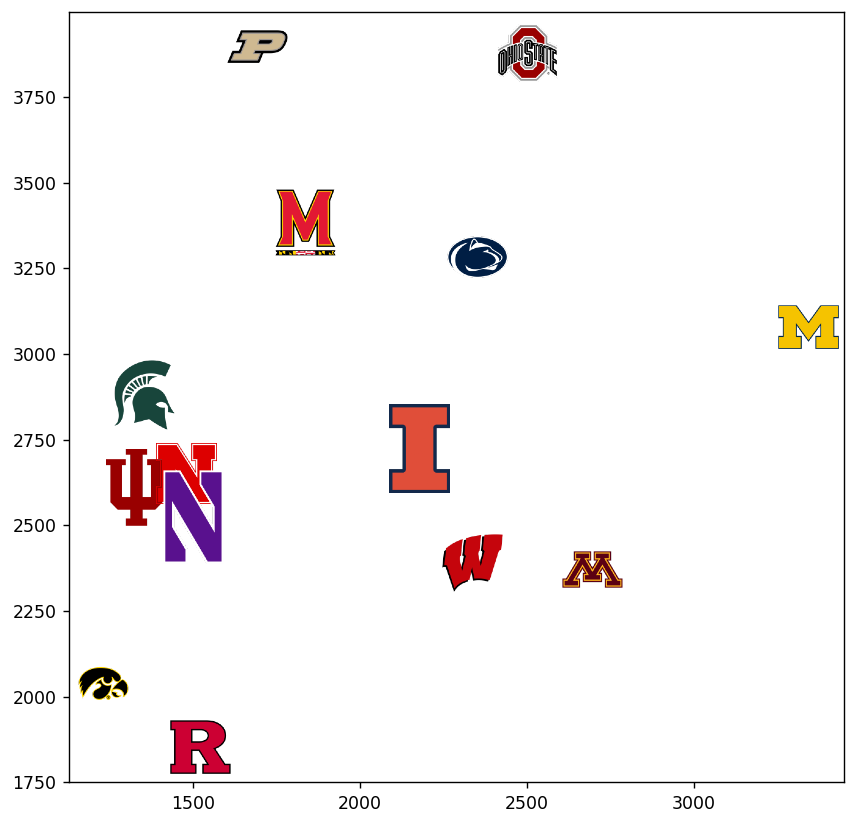

In [80]:
# fig, offense = plt.subplots(figsize=(8,8), dpi=125)
# offense.scatter(df['rushingYards'],df['netPassingYards'], color = 'white')

# for index, row in df.iterrows():
#     ab = AnnotationBbox(getLogo(row['Logo']),(row['rushingYards'],row['netPassingYards']),frameon = False)
#     offense.add_artist(ab)

# cursor(hover=True)

# plt.show(offense)

In [24]:


alt.Chart(df, title = '2022 Big Ten Best Offenses').mark_image(
    width=30,
    height=30
).encode(
    alt.X('rushingYards:Q').scale(zero=False),
    alt.Y('netPassingYards').scale(zero=False),
    url='Logo',
    tooltip=['Season','Team','rushingYards','netPassingYards']
).interactive()

alt.Chart(...)

<Axes: xlabel='rushingYards', ylabel='Team'>

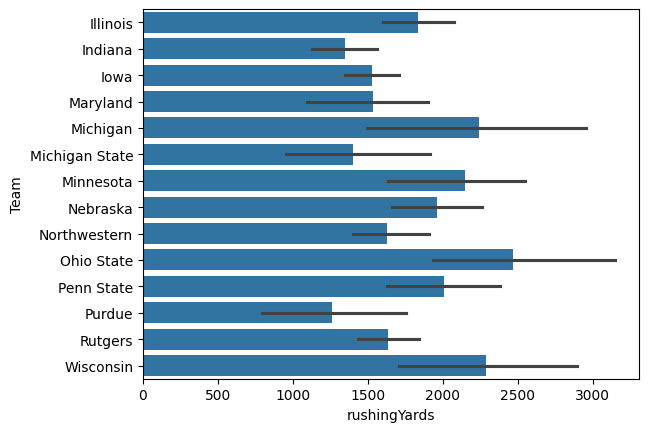

In [2]:
# sns.barplot(df, y="Team", x="rushingYards", legend=False)